In [773]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_data_path = "../Resources/mouse.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

# Visualizing data
study_results.info()
print('!------------------------------------------------------!')
study_results.info()


# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on= 'Mouse ID')
# Display the data table for preview
combined_study_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB
!------------------------------------------------------!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [774]:
# Checking the number of mice ID's.
combined_study_data['Mouse ID'].count()

1893

In [775]:
# Total number of mice used. Unique mouse id's only 
combined_study_data['Mouse ID'].nunique()

249

In [776]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
cleaned_mice = combined_study_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)
cleaned_mice




# combined_study_data.drop_duplicates().groupby(['Mouse ID', 'Timepoint'])[['Mouse ID', "Timepoint"]].count()


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [777]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_study_data[cleaned_mice]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [846]:
# Dropping duplicate mouse by id 
cleaned_data_drop = combined_study_data[combined_study_data['Mouse ID'] == 'g989']

cleaned_mice = combined_study_data.drop(cleaned_data_drop.index)


Printing cleaned mouse data
cleaned_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [779]:
# Checking the number of mice ID's after cleaning.
cleaned_mice['Mouse ID'].count()

1880

In [780]:
# Total number of mice used. Unique mouse id's only 
cleaned_mice['Mouse ID'].nunique()

248

In [781]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment

#grouping by 'Drug Regimen'
#caluculating mean of 'Tumor Volume (mm3)' and converting to dataFrame
tumor_mean = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().to_frame()


#grouping by 'Drug Regimen'
#caluculating median of 'Tumor Volume (mm3)' and converting to dataFrame
tumor_median = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().to_frame()


#grouping by 'Drug Regimen'
#caluculating variance of 'Tumor Volume (mm3)' and converting to dataFrame
tumor_variance = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().to_frame()


#grouping by 'Drug Regimen'
#caluculating standard deviation of 'Tumor Volume (mm3)' and converting to dataFrame
tumor_standard_deviation = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().to_frame()


#grouping by 'Drug Regimen'
#caluculating SEM of 'Tumor Volume (mm3)' and converting to dataFrame
tumor_sem = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().to_frame()

# merge 'tumor_mean' and 'tumor_median'
merge_mean_median = pd.merge(tumor_mean, tumor_median,
                                 how='outer', on='Drug Regimen')

# merging 'tumor_variance' and 'tumor_standard_deviation'
merge_variance_std = pd.merge(tumor_variance, tumor_standard_deviation,
                                 how='outer', on='Drug Regimen')

# merging 'merge_variance_std' and 'tumor_sem'
merge_variance_std_sem = pd.merge(merge_variance_std, tumor_sem,
                                 how='outer', on='Drug Regimen')

# merging 'merge_mean_median' and 'merge_variance_std_sem'
merge_mean_median_variance_std_sem = pd.merge(merge_mean_median,merge_variance_std_sem, 
                                              how='outer', on='Drug Regimen')

#removing Drug Regimen index title
merge_mean_median_variance_std_sem.index.name = None

# Renaming columns 
renamed_merge_mean_median_variance_std_sem = merge_mean_median_variance_std_sem.rename(columns={'Tumor Volume (mm3)_x_x': 'Tumor Mean', 'Tumor Volume (mm3)_y_x': 'Tumor Median', 'Tumor Volume (mm3)_x_y': 'Tumor Variance', 'Tumor Volume (mm3)_y_y': 'Tumor STD', 'Tumor Volume (mm3)': 'Tumor SEM' })

# Show cleaned dataframe 
renamed_merge_mean_median_variance_std_sem

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


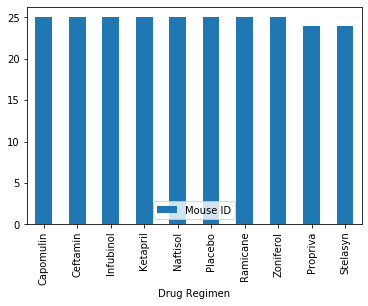

In [782]:
# Creating dataframe with total number of mice for each treatment
mince_per_treatment = cleaned_mice.groupby(['Drug Regimen'])['Mouse ID'].nunique().to_frame()

# Sorting dataframe
sorted_data = mince_per_treatment.sort_values(by='Mouse ID', ascending=False)

# Bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
sorted_data.plot.bar()


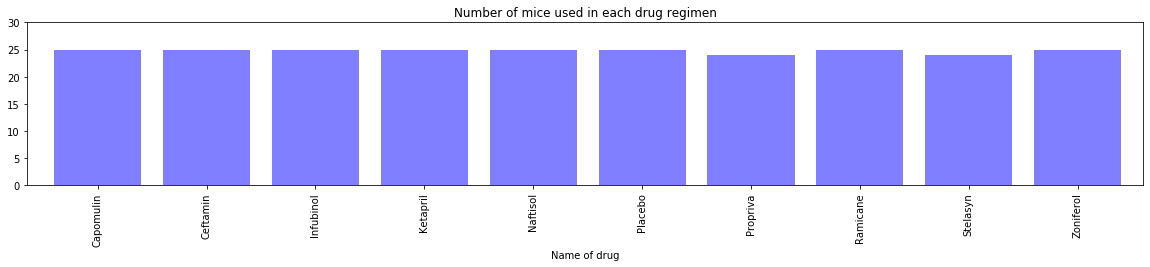

In [783]:

# num_mice = mince_per_treatment['Mouse ID']
drugs = cleaned_mice.groupby(['Drug Regimen'])['Mouse ID'].nunique()

cleaned_data = drugs.to_frame().reset_index()
cleaned_data

# # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(cleaned_data['Drug Regimen'], cleaned_data['Mouse ID'], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(cleaned_data['Drug Regimen']))
plt.ylim(0, max(drugs)+5)

# Set a Title and labels
plt.title("Number of mice used in each drug regimen")
plt.xlabel("Name of drug")


# Show plot 
plt.show()

In [790]:
# Counting spread of males vs females  
distribution_m_vs_f = dropped_duplicate_mice['Sex'].value_counts()
print(distribution_m_vs_f)

Male      125
Female    123
Name: Sex, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb27a077c10>],
      dtype=object)

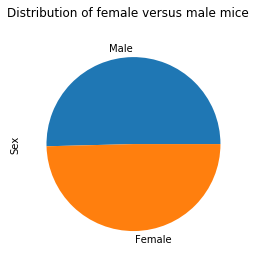

In [791]:
# Generate pie plot showing the distribution of female versus male mice using pandas

# Dropping duplicates records of mice by mouse ID 
dropped_duplicate_mice = cleaned_mice.drop_duplicates(subset=['Mouse ID'])

# Counting and plotting the 'sex' column after duplicates were dropped 
distribution_m_vs_f = dropped_duplicate_mice['Sex'].value_counts()

# Showing plot
distribution_m_vs_f.plot.pie(subplots=True, title= 'Distribution of female versus male mice')

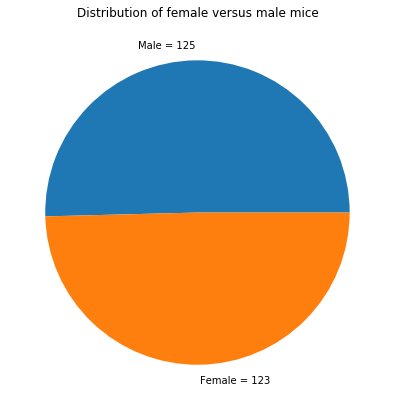

In [792]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


mice_data = dropped_duplicate_mice['Sex'].value_counts()

names = ['Male = 125', 'Female = 123']

# Creating plot 
sex_of_mice = plt.figure(figsize =(10, 7)) 
plt.pie(mice_data,labels= names) 
plt.title('Distribution of female versus male mice')

# show plot 
plt.show() 


In [833]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_cap = cleaned_mice.loc[:,['Drug Regimen','Mouse ID','Tumor Volume (mm3)', 'Timepoint']]

# Get the indexes of the row(s) with the largest Timepoint
largest_timepoint_indexes = final_tumor_cap.groupby('Mouse ID')['Timepoint'].transform(max) == final_tumor_cap['Timepoint']

# Pull the full rows where the indexes are the largest timepoint(s)
minimum_tumor_size = final_tumor_cap[largest_timepoint_indexes]
minimum_tumor_size

# Quick validation 
assert minimum_tumor_size[minimum_tumor_size['Mouse ID'].str.contains("m957")]["Tumor Volume (mm3)"].item() == 33.32909778

drug_data = minimum_tumor_size.set_index(['Drug Regimen'])


# retrieving row by loc method 
capomulin = drug_data.loc["Capomulin"] 


#retrieving row by loc method 
ramicane = drug_data.loc["Ramicane"] 


# retrieving row by loc method 
infubinol = drug_data.loc["Infubinol"] 


# retrieving row by loc method 
ceftamin = drug_data.loc["Ceftamin"] 



# Concatenating 'Capomulin' and 'Ramicane'
concat_capomulin_and_ramicane = pd.concat([capomulin,ramicane], axis = 0)


# Concatenating 'infubinol' and 'ceftamin'
concat_infubinol_and_ceftamin = pd.concat([infubinol,ceftamin], axis = 0)

concat_capomulin_ramicane_infubinol_ceftamin = pd.concat([concat_capomulin_and_ramicane,concat_infubinol_and_ceftamin], axis = 0 )
concat_capomulin_ramicane_infubinol_ceftamin

# # Sort the rows of dataframe by column 'Name'
# capomulin = minimum_tumor_size.sort_values(by ='Drug Regimen')
# capomulin

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,s185,23.343598,45
Capomulin,x401,28.484033,45
Capomulin,m601,28.430964,45
Capomulin,f966,30.485985,20
Capomulin,u364,31.023923,45
...,...,...,...
Ceftamin,x226,45.000000,0
Ceftamin,x581,64.634949,45
Ceftamin,x822,61.386660,45


In [862]:
# Put treatments into a list for for loop (and later for plot labels)

# capomulin list
index_concat_capomulin_ramicane_infubinol_ceftamin = concat_capomulin_ramicane_infubinol_ceftamin.reset_index()
list_concat_capomulin_ramicane_infubinol_ceftamin = index_concat_capomulin_ramicane_infubinol_ceftamin.values.tolist()
# print(list_concat_capomulin_ramicane_infubinol_ceftamin)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

data = concat_capomulin_ramicane_infubinol_ceftamin['Tumor Volume (mm3)'].sort_values() 

# First quartile (Q1) 
Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  
# Third quartile (Q3) 
Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
# # Interquaritle range (IQR) one way 
# IQR = Q3 - Q1 

# Interquartile range (IQR) 
IQR = st.iqr(data, interpolation = 'midpoint') 

# Printing quartiles    
print(f'First quartile = {Q1}')
print(f'Third quartile = {Q3}') 
print(f'Interquartile = {IQR}') 


# Locate the rows which contain mice on each drug and get the tumor volumes

# capomulin list
indexed_capomulin = capomulin.reset_index()
list_capomulin = indexed_capomulin.values.tolist()
   
# ramicane list 
indexed_ramicane = ramicane.reset_index()
list_ramicane = indexed_ramicane.values.tolist()


# infubinol list 
indexed_infubinol = infubinol.reset_index()
list_infubinol = indexed_infubinol.values.tolist()


# ceftamin list 
indexed_ceftamin = ceftamin.reset_index()
list_ceftamin = indexed_ceftamin.values.tolist()


# ceftamin list 
indexed_ceftamin = ceftamin.reset_index()
list_ceftamin = indexed_ceftamin.values.tolist()

#add subset 
    
    
# Determine outliers using upper and lower bounds


First quartile = 37.149837274999996
Third quartile = 60.00856799
Interquartile = 22.858730715000007


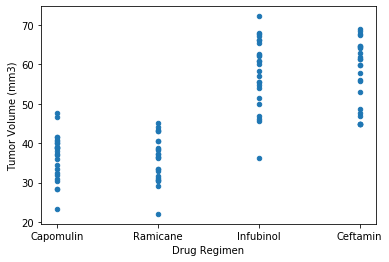

In [860]:
# scatter plot by drug and tumor vol
index_concat_capomulin_ramicane_infubinol_ceftamin.plot.scatter(x='Drug Regimen',
                      y='Tumor Volume (mm3)')

Capomulin         AxesSubplot(0.1,0.559091;0.363636x0.340909)
Ceftamin     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Infubinol             AxesSubplot(0.1,0.15;0.363636x0.340909)
Ramicane         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

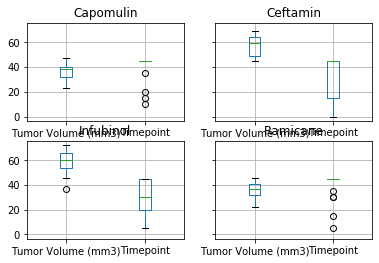

In [867]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
concat_capomulin_ramicane_infubinol_ceftamin.boxplot

index_concat_capomulin_ramicane_infubinol_ceftamin.plot.scatter(x='Drug Regimen',
                      y='Tumor Volume (mm3)')

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
